# Week 4 - Linear Algebra Review

In [1]:

# setup the presentation settings
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'start_slideshow_at': 'selected',
              'transition': 'fade'
})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'fade'}

In [2]:
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Linear algebra

Why do we need it
- It simplies analyses - a lot
- It allows for wick fast operations on computers.

Matrix matrix multiplication.

- A has n x k dimensions
- B has k x m dimensions
- Then AB = C has n x m dimensions.

In [3]:
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
A 

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [4]:
B = np.array([1, 1, 1])
B

array([1, 1, 1])

Sum over all rows

In [5]:
A.dot(B)

array([6, 6, 6])

Sum over all columns

In [6]:
B.dot(A)

array([3, 6, 9])

Another example

In [7]:
A = np.array([[1, 2, 3], [1, 2, 3]])
A 

array([[1, 2, 3],
       [1, 2, 3]])

In [8]:
B = np.array([[1, 1], [2, 3]])
B

array([[1, 1],
       [2, 3]])

# Dimensionality Reduction

Typical microbiome/metabolomic dataset - thousands of microbes/metabolites.
For simplicity, we'll refer both of these as `features`.

Interpreting thousands of features can be overwhelming.  No one can visualize more than 10 dimensions, let alone 1000.
We want to be able to visualize the large shifts, at the expense of some information loss.

To do this, we need to obtain a basic understanding of Eigendecomposition.

# It all boils down to perspective
<img src="mario.png" style="height: 400px;">
If you wanted to uniquely identify mario, which side would you choose?

Alright.  Mathematically, what does this look like?


# Eigenvalue Decomposition

We have an table $A$.
- Rows of $A$ are samples
- Columns of $A$ are columns

An vector $v$ is said to be an _eigenvector_ if the following holds.

$Av = \lambda v$

and $v$ is the corresponding _eigenvalue_

What exactly is this saying?

It is saying that $v$ is an _axis_ of $A$, similar to the $x$, $y$, and $z$ axes we are familiar with in 3D spaces.

And $\lambda$ captures information about how much of $A$ is explained by $v$.

In [9]:
B = np.array([[10, 0], 
              [0, 20]])
B

array([[10,  0],
       [ 0, 20]])

What are the eigenvectors and eigenvalues?

In [10]:
x1 = np.array([[1],
               [0]])
h = 10
B.dot(x1)

array([[10],
       [ 0]])

In [11]:
h*x1

array([[10],
       [ 0]])

Can you guess the other eigenvector?

In [12]:
x1 = np.array([1, 0])
x2 = np.array([0, 1])

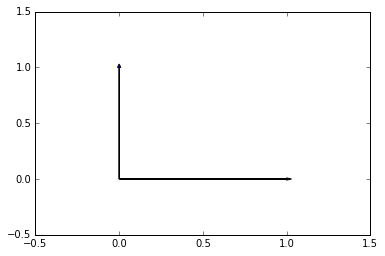

In [13]:
plt.arrow(0, 0, x1[0], x1[1])
plt.arrow(0, 0, x2[0], x2[1])
_ = plt.xlim([-0.5, 1.5])
_ = plt.ylim([-0.5, 1.5]) 

What do you notice?

In [14]:
x1.dot(x2)

0

Eigenvectors can be solved using eigenvalue decomposition as follows

$det(A - \lambda I)v = 0$

Since we want to solve for $Av - \lambda v = 0$

Once values for $v$ are obtained, the original matrix can be obtained as follows

$A = V \Lambda V^{-1}$

Where $V$ is the matrix of all eigenvectors, and $\Lambda$ is the matrix of eigenvalues (eigenvalues along the diagonal).

Let's see if we can obtain the correct eigenvectors from the previous example.

In [15]:
L, V = np.linalg.eigh(B)
V

array([[ 1.,  0.],
       [ 0.,  1.]])

In [16]:
L

array([ 10.,  20.])

What if we try a more tricky example.

In [17]:
C = np.array([[10, 5], 
              [2, 20]])
L, V = np.linalg.eigh(C)
V

array([[-0.98195639,  0.18910752],
       [ 0.18910752,  0.98195639]])

In [18]:
L

array([  9.61483519,  20.38516481])

(-1.5, 1.5)

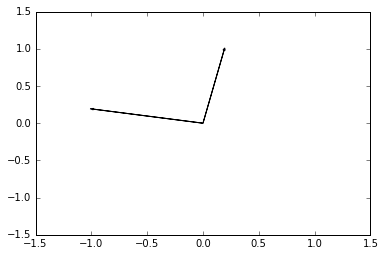

In [19]:
x1 = V[:, 0]
x2 = V[:, 1]
plt.arrow(0, 0, x1[0], x1[1])
plt.arrow(0, 0, x2[0], x2[1])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

In [20]:
x1.dot(x2)

0.0

It is important to note that this procedure only works on a square matrix.

How many of you had an exact square table (# rows = # columns)?

# Singular value decomposition

A generalization of eigenvalue decomposition applied to arbitrary dimensions of $A$.

$A = U \Lambda V$

Where $U$ is the eigenvectors for the rows (samples) and $V$ is the eigenvectors for the columns (features)
and the diagonals in $\Lambda$ are eigenvalues.  

Let's step through an example of singular value decomposition.

Here, we have generated a normal distribution on 2 dimensions, that is stretched and rotated on an axis.

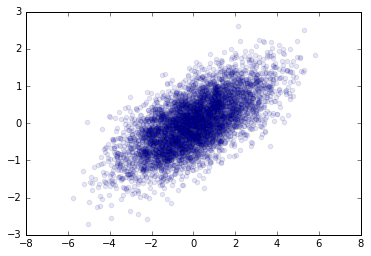

In [21]:
ux, uy = 0, 0
cov = np.array([[1, 0.05],
                [3, 1]])
num_points = 5000
points = np.random.multivariate_normal([ux, uy], cov, size=num_points)
plt.scatter(points[:, 0], points[:, 1], alpha=0.1)

Now we can apply SVD!

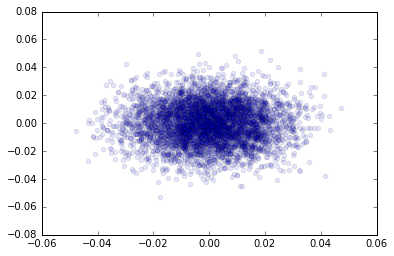

In [22]:
u, s, v = scipy.linalg.svd(points)
plt.scatter(u[0, :], u[1, :], alpha=0.1)

Note that this shrunk, and rotated the blob to line up with x, and y

This is basically what is happening in Principal Component Analysis (PCA)

We just focus on the _largest_ axes first.